The accurate determination of occupancy detection in buildingshas been recently estimated to save energy in the order of 30 to 42%. Experimental measurements reported that energy savingswas 37% in and between 29% and 80% when occupancy data was used as an input. 

The determination of occupancy a very promis-ing approach to lower energy consumption in buildings. 

Other applications for occupancy detection include security and determination of building occupant behaviors. A system that could accurately detect the presence of the occupants without using a camera is very interesting due to privacy concerns.

In [27]:
!pip install gcsfs

In [28]:
import pandas as pd
import gcsfs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading data files from google cloud storage using gcsfs python package

In [29]:
fs = gcsfs.GCSFileSystem(project='omina-gcp-resource')
with fs.open('omina-test-set/occupancy-data/occupancy_data.csv') as f:
    df = pd.read_csv(f)

Reading data files from google cloud storage  using google datalab storage package

In [30]:
import google.datalab.storage as storage
import pandas as pd
from io import BytesIO

mybucket = storage.Bucket('omina-test-set')
data_csv = mybucket.object('occupancy-data/occupancy_data.csv')

uri = data_csv.uri
%gcs read --object $uri --variable data

df = pd.read_csv(BytesIO(data))
df['color']= np.where( df['Occupancy']==1, "limegreen", "blue")
df.head()

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,color
0,1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1,limegreen
1,2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1,limegreen
2,3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1,limegreen
3,4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1,limegreen
4,5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1,limegreen


Converting date variavle to python datetime variable

In [31]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
del df['date']
del df['Unnamed: 0']
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,color
date,,,,,,,
2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1,limegreen
2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1,limegreen
2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1,limegreen
2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1,limegreen
2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1,limegreen


In [32]:
print (df.index.min())
print (df.index.max())

2015-02-02 14:19:00
2015-02-18 09:19:00


Sub-plotting each variables to visualize the time-series patterns

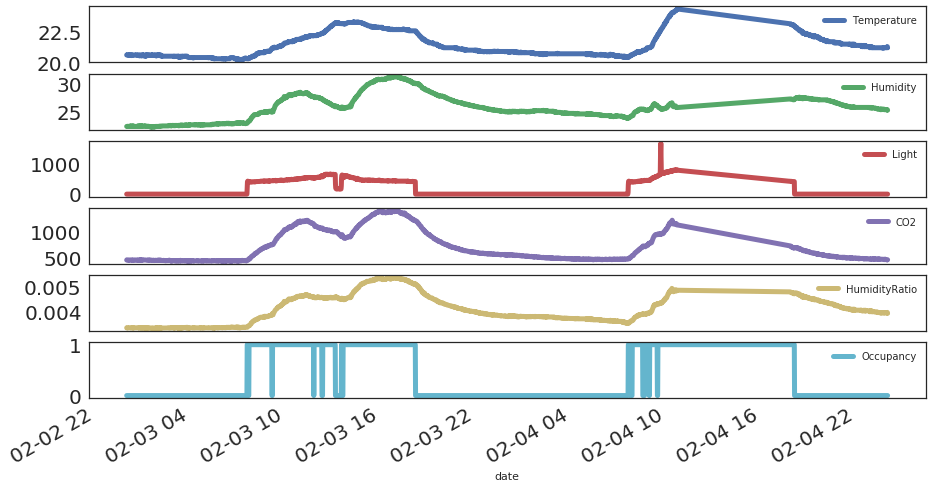

In [33]:
df['2015-02-03' : '2015-02-04'].plot(subplots=True, figsize=(15,8), linewidth=5, fontsize=20)
plt.legend(loc='best')

Pair plotting to see the scatter diagram for each pair of variables

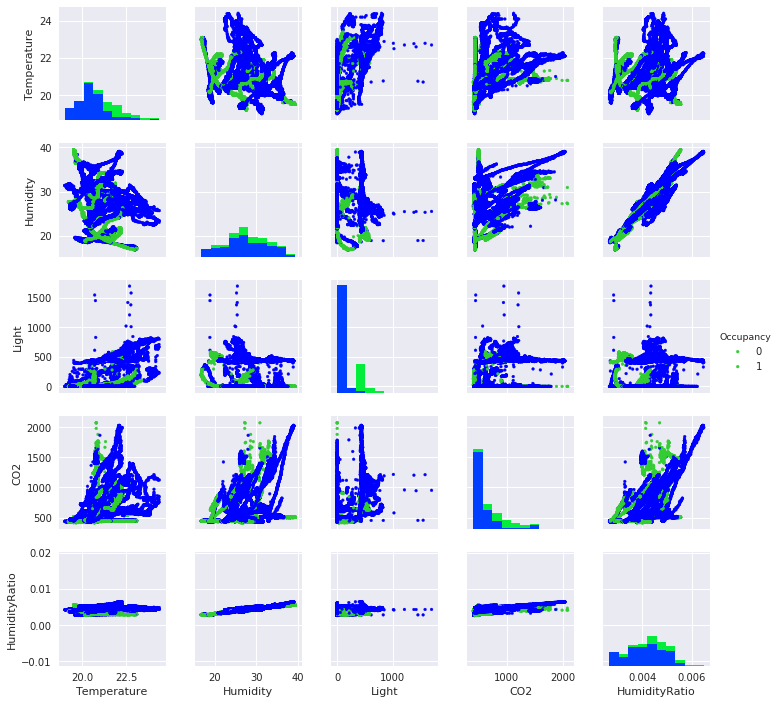

In [34]:
sns.set(style="white")
sns.set(color_codes=True)
sns.set_palette("bright", 2)
g = sns.pairplot(df,
                 hue="Occupancy",
                 size = 2,
                 plot_kws={"s": 8, 'alpha': 1, 'edgecolor': df['color'], 'facecolors':df['color']},
                 vars=["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])


Correlation plot of variables

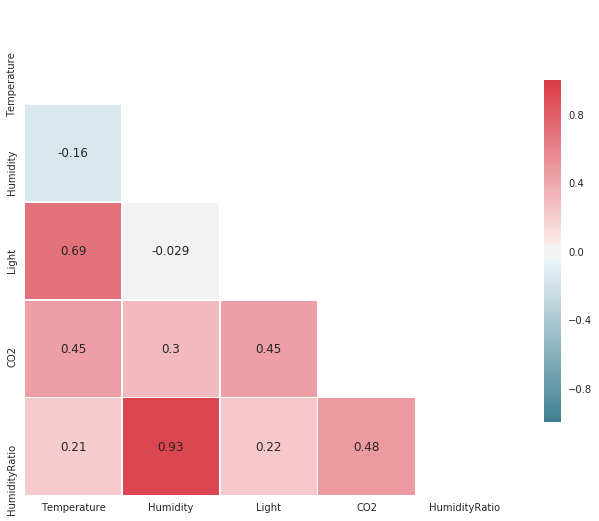

In [35]:
df1 = df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
corr = df1.corr()
sns.set(style = "white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})